TensorFlow와 Keras를 사용하여 MNIST 손글씨 숫자 데이터셋에 대해 간단한 인공 신경망(ANN) 모델을 구축하고 학습하는 예시입니다

# 데이터 셋 소개

In [ ]:
# MNIST 손글씨 숫자 데이터셋

In [ ]:
#  MNIST 데이터셋은 손으로 쓴 숫자 이미지로 구성되어 있으며, 0부터 9까지의 숫자를 포함하고 있습니다.

# MNIST 데이터셋의 주요 특징
# 샘플 수:

# 훈련 데이터: 60,000개의 손글씨 숫자 이미지
# 테스트 데이터: 10,000개의 손글씨 숫자 이미지
# 총 70,000개의 이미지로 구성되어 있습니다.
# 이미지 크기:

# 각 이미지의 크기는 28x28 픽셀입니다.
# 이미지의 해상도는 낮고 흑백입니다. 픽셀 값은 0에서 255까지의 값으로, 0은 검정색(배경), 255는 흰색(숫자)에 해당합니다.
# 레이블:

# 각 이미지에 대응되는 레이블이 존재하며, 이 레이블은 0부터 9까지의 숫자를 나타냅니다.
# 레이블은 이미지에 나타난 손글씨 숫자를 의미하며, 분류 문제의 목표는 이미지를 보고 숫자를 예측하는 것입니다.
# 이미지 데이터 형식:

# 각 이미지는 28x28 픽셀 크기의 2D 배열로 표현되며, 각 픽셀은 0~255 사이의 그레이스케일 값을 가집니다.
# 예를 들어, 0은 완전한 검정색, 255는 완전한 흰색을 나타냅니다.
# 데이터셋 구조
# x_train, y_train: 훈련 데이터와 훈련 레이블
# x_train: (60,000, 28, 28) 크기의 배열로, 60,000개의 이미지와 각 이미지의 28x28 픽셀을 포함합니다.
# y_train: 각 이미지에 대응되는 레이블(0~9)
# x_test, y_test: 테스트 데이터와 테스트 레이블
# x_test: (10,000, 28, 28) 크기의 배열로, 10,000개의 테스트 이미지
# y_test: 각 테스트 이미지에 대응되는 레이블
# 데이터셋 활용
# MNIST 데이터셋은 머신러닝 및 딥러닝 알고리즘을 테스트하고 비교하는 데 많이 사용됩니다. 특히, 다음과 같은 모델에 자주 활용됩니다.

# 인공신경망(ANN): 간단한 신경망을 이용해 손글씨 숫자를 분류하는 문제로 많이 사용됩니다.
# 컨볼루션 신경망(CNN): 이미지 데이터 특성에 맞춰 CNN을 적용하여 더 높은 정확도를 얻을 수 있습니다.
# 기본적인 머신러닝 알고리즘: SVM, KNN, 랜덤 포레스트 등 전통적인 머신러닝 알고리즘으로도 MNIST 분류 문제를 해결할 수 있습니다.

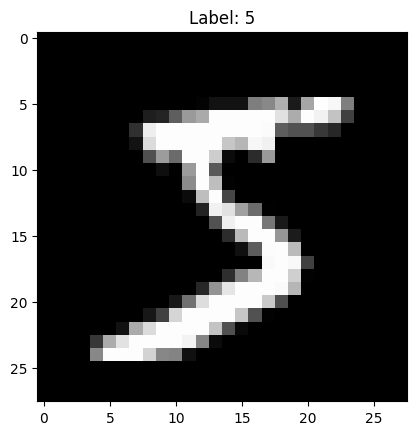

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 첫 번째 이미지 출력
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [ ]:
# MNIST 데이터셋에서 첫 번째 이미지를 출력하고 그에 해당하는 레이블을 확인할 수 있습니다.

In [ ]:
# MNIST 데이터셋은 이미지 분류 문제에서 널리 사용되는 데이터셋으로, 초보자가 딥러닝과 머신러닝을 학습하기에 이상적입니다. 
# 픽셀 데이터를 이용한 손글씨 숫자 분류는 다양한 모델의 성능을 비교하고 학습하는 데 매우 유용합니다.

# 실습

## 데이터 준비

In [ ]:
# MNIST 데이터셋 로드: tf.keras.datasets.mnist를 통해 MNIST 데이터를 로드합니다. 
# 이 데이터셋은 28x28 크기의 손글씨 숫자 이미지와 각 이미지에 대한 레이블(0~9)이 포함되어 있습니다.
# 정규화(Normalization): 픽셀 값이 0~255 사이의 값이기 때문에, 이를 0~1 사이로 스케일링하여 학습이 잘 이루어지도록 정규화합니다.

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화


 ## 모델 정의

In [ ]:
# Sequential 모델: Sequential()을 통해 각 레이어가 순차적으로 연결되는 신경망 모델을 정의합니다.
# Flatten 층: 입력 데이터가 28x28 이미지이므로 이를 일차원 벡터로 펼쳐줍니다.
# Dense 층: 첫 번째 은닉층으로 128개의 뉴런을 가지며, 활성화 함수로 ReLU를 사용합니다.
# Dense 층을 이용한 다중 클래스 분류 문제를 해결합니다.
# Dropout 층: 과적합을 방지하기 위해 20%의 뉴런을 무작위로 끕니다.
# Dense 출력층: 10개의 뉴런을 가지는 출력층입니다. 소프트맥스(Softmax) 활성화 함수를 사용하여 다중 클래스 분류를 수행합니다.

In [ ]:
# 모델 구조:
# 입력: 28x28 픽셀 크기의 이미지를 펼친 후,
# 128개의 은닉 뉴런을 거쳐,
# 출력층에서 10개의 클래스(숫자 0~9)에 대한 확률을 출력합니다.

In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 입력층
    layers.Dense(128, activation='relu'),  # 은닉층
    layers.Dropout(0.2),                   # 드롭아웃
    layers.Dense(10, activation='softmax') # 출력층
])


c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 모델 컴파일

In [ ]:
# Optimizer: Adam 옵티마이저를 사용하여 가중치 업데이트를 수행합니다.
# Loss 함수: 다중 클래스 분류 문제이므로 sparse_categorical_crossentropy 손실 함수를 사용합니다. 이는 레이블이 정수로 제공될 때 사용됩니다.
# 평가지표: 모델 성능을 평가하기 위한 지표로 accuracy를 사용합니다.

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## 모델 학습

In [ ]:
# 학습: 훈련 데이터를 사용해 5번 반복(에포크)하여 모델을 학습시킵니다.

In [7]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8582 - loss: 0.4873
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9548 - loss: 0.1502
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9671 - loss: 0.1070
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9752 - loss: 0.0838
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9783 - loss: 0.0692


## 모델 평가

In [ ]:
# 평가: 테스트 데이터를 사용해 학습된 모델을 평가하고 정확도와 손실 값을 출력합니다.

In [8]:
model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9722 - loss: 0.0916


[0.07774345576763153, 0.9758999943733215]

## 결과 해석

In [ ]:
# 모델 평가 값으로 제공된 두 개의 값 **0.07774345576763153**와 **0.9758999943733215**는 각각 **손실 값(loss)**과 **정확도(accuracy)**를 의미합니다. 이를 설명하겠습니다:

# 1. 손실 값 (Loss): 0.07774345576763153
# 손실(Loss)은 모델이 예측한 값과 실제 정답 사이의 차이를 수치화한 값입니다. 
# 이 값은 모델이 얼마나 잘못 예측했는지를 나타냅니다.
# 손실 함수로는 주로 크로스 엔트로피(Categorical Crossentropy)를 사용합니다. 이 값은 낮을수록 모델의 성능이 더 좋다는 의미입니다. 즉, 손실 값이 작으면 모델의 예측이 실제 값에 더 가깝다는 것을 의미합니다.
# 0.0777의 손실 값은 상당히 작은 값으로, 이는 모델이 예측하는 값이 실제 정답과 매우 가까운 결과를 내고 있음을 의미합니다.

# 2. 정확도 (Accuracy): 0.9758999943733215
# 정확도(Accuracy)는 모델이 얼마나 정확하게 예측했는지를 나타내는 값으로, 예측한 값 중에서 실제 정답과 일치하는 비율입니다.
# 0.9759는 정확도가 97.59%임을 의미합니다. 즉, 테스트 데이터에 대해 모델이 97.59%의 정확도로 올바른 예측을 했다는 의미입니다.
# 높은 정확도는 모델이 테스트 데이터에서 상당히 좋은 성능을 발휘하고 있음을 나타냅니다.


In [ ]:
# 종합 설명:
# 손실 값이 0.0777로 낮고, 정확도가 97.59%로 매우 높은 것으로 보아, 이 모델은 주어진 데이터셋에 대해 매우 좋은 성능을 보이고 있다고 해석할 수 있습니다.
# 모델의 목표는 손실 값을 최소화하고 정확도를 최대화하는 것이므로, 이 평가 결과는 훈련된 모델이 테스트 데이터에서도 매우 좋은 성능을 발휘하고 있음을 의미합니다.

# 참고:
# 손실 값은 주로 학습 과정에서 모델의 성능을 평가하는 지표이며, 낮을수록 모델이 더 잘 학습한 것입니다.
# 정확도는 모델이 예측한 정답의 비율을 나타내는 지표로, 분류 문제에서는 중요한 성능 지표입니다.

## 종합 코드

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. 데이터 준비
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화

# 2. 모델 정의
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 입력층
    layers.Dense(128, activation='relu'),  # 은닉층
    layers.Dropout(0.2),                   # 드롭아웃
    layers.Dense(10, activation='softmax') # 출력층
])

# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습
model.fit(x_train, y_train, epochs=5)

# 5. 모델 평가
model.evaluate(x_test, y_test)


c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8577 - loss: 0.4837
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9538 - loss: 0.1539
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9682 - loss: 0.1093
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9728 - loss: 0.0897
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9771 - loss: 0.0740
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9760 - loss: 0.0819


[0.07233167439699173, 0.978600025177002]